<a href="https://colab.research.google.com/github/Faabry/Data_Analysis/blob/main/Smartwatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando a base de dados a partir de um arquivo csv**

In [226]:
import pandas as pd
df = pd.read_csv("Fitness_trackers.csv")
pd.set_option("display.max_rows", None)
df.tail()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
560,Huawei,Smartwatch,Watch 36456,Black,"55,000","55,000",AMOLED Display,4.1,Silicone,14,NaN
561,Huawei,Smartwatch,GT Fortuna-B19S Sport,Black,"13,990","20,990",AMOLED Display,4.1,Elastomer,14,NaN
562,GOQii,FitnessBand,HR,Black,"1,999","1,999",OLED Display,3.8,Silicone,7,NaN
563,GOQii,FitnessBand,Vital,Black,"3,499","3,499",OLED Display,3.7,Thermoplastic polyurethane,7,NaN
564,FOSSIL,Smartwatch,Gen 5E,"Grey, Multicolor","18,495","18,495",AMOLED Display,4.2,Stainless Steel,1,NaN


# **Modificando os nomes das colunas**

In [227]:
df = df.rename(columns = {"Brand Name":"Brand", 
                          "Device Type":"Type", 
                          "Model Name":"Model", 
                          "Color":"Color", 
                          "Display":"Display",
                          "Rating (Out of 5)":"Rating",
                          "Average Battery Life (in days)":"AVG Battery",
                          "Reviews":"Reviews"})

*  Verficando os tipos primitivos das colunas e se existem valores **nulos**.

In [228]:
df.dtypes

Brand              object
Type               object
Model              object
Color              object
Selling Price      object
Original Price     object
Display            object
Rating            float64
Strap Material     object
AVG Battery         int64
Reviews            object
dtype: object

* Precisamos alterar os tipos primitivos das colunas **Selling Price** e **Original Price** para *float*.

In [229]:
df["Original Price"] = df["Original Price"].apply(lambda x: x.replace(",", ""))
df["Original Price"] = pd.to_numeric(df["Original Price"]).astype(float)

In [230]:
df["Selling Price"] = df["Selling Price"].apply(lambda x: x.replace(",", ""))
df["Selling Price"] = pd.to_numeric(df["Selling Price"]).astype(float)

In [231]:
df.head()

,Brand,Type,Model,Color,Selling Price,Original Price,Display,Rating,Strap Material,AVG Battery,Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499.0,2999.0,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099.0,2499.0,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722.0,2099.0,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469.0,2999.0,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799.0,2199.0,OLED Display,4.3,Plastic,7,NaN


# **Verificando valores núlos**

In [232]:
amostra = []
for column in df.columns:
  amostra.append([column, len(df[column].dropna())])
amostra

[['Brand', 565],
 ['Type', 565],
 ['Model', 565],
 ['Color', 565],
 ['Selling Price', 565],
 ['Original Price', 565],
 ['Display', 565],
 ['Rating', 514],
 ['Strap Material', 565],
 ['AVG Battery', 565],
 ['Reviews', 78]]

* Classificando os valores núlos por tipos.

In [233]:
nan_type = df.set_index("Type")
nan_type = nan_type.isna().groupby("Type").sum()

nan_type

,Brand,Model,Color,Selling Price,Original Price,Display,Rating,Strap Material,AVG Battery,Reviews
Type,,,,,,,,,,
FitnessBand,0,0,0,0,0,0,0,0,0,62
Smartwatch,0,0,0,0,0,0,51,0,0,425


* A coluna *Rating* tem **51** valores faltando na categoria FitnessBand.

* A coluna *Review* tem **62** valores faltando na categoria FitnessBand e **425** na categoria Smartwatch.

# **Adquirindo os valores numéricos**

In [234]:
numeric_variable = df._get_numeric_data()
avg = round(numeric_variable.mean())
std = round(numeric_variable.std())
max = round(numeric_variable.max())
min = round(numeric_variable.min())

In [235]:
values = pd.DataFrame([avg, std, max, min], columns=["Selling Price",
                                                     "Original Price",
                                                     "Rating",
                                                     "AVG Battery"])
values["Values"] = ["mean",
                    "std",
                    "max",
                    "min"]

values.set_index("Values", inplace=True)
values

,Selling Price,Original Price,Rating,AVG Battery
Values,,,,
mean,22110.0,25365.0,4.0,9.0
std,19915.0,20384.0,0.0,8.0
max,122090.0,122090.0,5.0,45.0
min,1195.0,1599.0,2.0,1.0


# **Question 1: Qual foi o produto mais vendido ?** 

* Vamos agrupar todos os produtos por **marca** usando o método **groupby**

In [236]:
brand = df[["Brand",
           "Selling Price",
           "Original Price",
           "Rating"]].groupby("Brand").count().sort_values(by=["Selling Price"],
                                                           ascending=False)

In [237]:
brand

,Selling Price,Original Price,Rating
Brand,,,
FOSSIL,133,133,133
GARMIN,101,101,50
APPLE,86,86,86
FitBit,51,51,51
SAMSUNG,48,48,48
huami,36,36,36
Huawei,26,26,26
Honor,20,20,20
Noise,17,17,17


## Sabemos que o **top 3** das marcas mais vendidas foram:
* FOSSIL
* Garmin
* Apple

* ## No entanto ainda precisamos identificar qual foi de fato o produto mais vendido da marca **Fossil**.

In [238]:
# Não estava conseguindo retornar as linhas da coluna "Brand" que fossem iguais a
# FOSSIL, então decidi remover possiveis espaços em branco que pudessem estar no nome

df["Brand"] = df["Brand"].apply(lambda x: x.replace(" ", ""))
best_seller = df.loc[df["Brand"] == "FOSSIL"]

In [239]:
best_seller.head()

,Brand,Type,Model,Color,Selling Price,Original Price,Display,Rating,Strap Material,AVG Battery,Reviews
222,FOSSIL,Smartwatch,Gen 5 Carlyle HR,Black,15995.0,22995.0,AMOLED Display,4.2,Leather,2,NaN
223,FOSSIL,Smartwatch,Gen 5 Carlyle HR,"Brown, Grey",14995.0,22995.0,AMOLED Display,4.2,Leather,2,NaN
224,FOSSIL,Smartwatch,Gen 5 Garrett HR,Silver,15995.0,22995.0,AMOLED Display,4.1,Stainless Steel,2,NaN
225,FOSSIL,Smartwatch,Gen 5 Julianna HR,Gold,18495.0,18495.0,AMOLED Display,3.8,Stainless Steel,2,NaN
226,FOSSIL,Smartwatch,Gen 5 Julianna HR,Black,18995.0,22995.0,AMOLED Display,4.3,Stainless Steel,2,NaN


* Criei um agrupamento dos modelos vendidos para que pudesse verificar a quantidade vendida de cada produto

* Filtrando qual foi o **produto mais vendido**.

In [240]:
best_seller = best_seller[["Model",
                           "Selling Price",
                           "Original Price",
                           "Rating",
                           "AVG Battery",
                           "Reviews"]].groupby("Model").count().sort_values(by=["Selling Price"],
                                                                                 ascending=False)

In [241]:
best_seller.head()

,Selling Price,Original Price,Rating,AVG Battery,Reviews
Model,,,,,
Gen 5 Julianna HR,6,6,6,6,0
Jacqueline Hybrid,5,5,5,5,0
Marshall,4,4,4,4,0
Sport,4,4,4,4,0
Gen 3 Q Explorist,4,4,4,4,0


## O Produto mais vendido foi **Gen 5 Julianna HR** da marca **FOSSIL** com 6 unidades vendidas.

* Definindo o eixo **y** e o eixo **x** para plotar no gráfico.

In [243]:
y = best_seller
x = y["Selling Price"]


x = x.iloc[0:10]
y = y.iloc[0:10]

y = y.index

In [244]:
data = list(zip(x, y))
data.sort()
x, y = zip(*data)

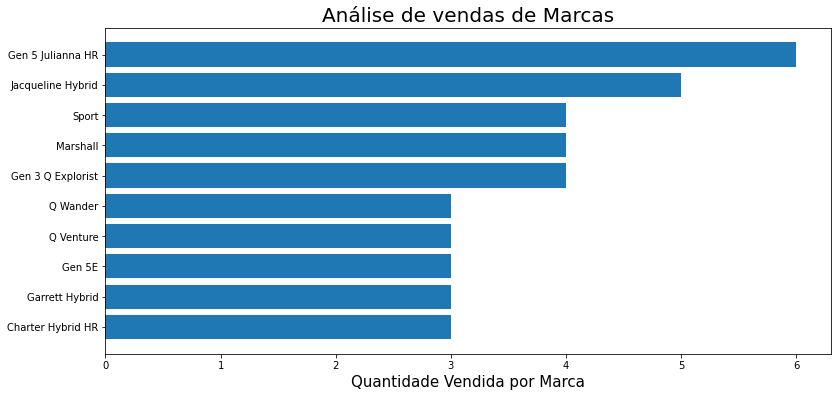

In [246]:
import matplotlib.pyplot as plt


plt.figure(figsize=(13, 6))
plt.title("Análise de vendas de Marcas", size=20)
plt.barh(y, x)
plt.xlabel("Quantidade Vendida por Marca", size=15)
plt.show()

# **Conclusão:**
* # O produto **5 Gen Julianna HR** foi o produto mais vendido, mas será que ele foi também o **mais bem avaliado?**

# **Question 2: Qual foi o produto mais bem avaliado?**

* Criando um filtro com os maiores valores da coluna **Rating (Out of 5)**.

In [96]:
df["Rating"].max()

5.0

In [111]:
rating_5 = df.loc[df["Rating"] == 5.0, ["Brand", "Type", "Model", "Color", "Rating"]]
rating_5 = pd.DataFrame(rating_5)
rating_5

,Brand,Type,Model,Color,Rating
179,SAMSUNG,Smartwatch,Galaxy Classic 4 LTE,Black,5.0
241,FOSSIL,Smartwatch,Neutra Hybrid,Silver,5.0
252,FOSSIL,Smartwatch,Neutra Hybrid,"Brown,Black",5.0
307,FOSSIL,Smartwatch,FTW1159 Hybrid,Gold,5.0
392,APPLE,Smartwatch,Series 7 GPS 45 mm,Black,5.0
420,APPLE,Smartwatch,Series 7 GPS 41 mm Aluminium Case,Black,5.0
461,GARMIN,Smartwatch,Instinct,Graphite,5.0
506,GARMIN,Smartwatch,Forerunner 745 Black,Black,5.0
509,GARMIN,Smartwatch,vivoactive 4S 40mm,"RoseGold,SlateBlack",5.0


* Tivemos **9** produtos com **avaliação máxima**, vamos verifiar se existe algum produto que foi avaliado duas ou mais vezes por clientes.

In [123]:
rating_5["Amount"] = ""

In [125]:
five_stars = rating_5[["Model", "Amount"]].groupby("Model").count().sort_values(by="Amount", ascending=False)
five_stars

,Amount
Model,
Neutra Hybrid,2
FTW1159 Hybrid,1
Forerunner 745 Black,1
Galaxy Classic 4 LTE,1
Instinct,1
Series 7 GPS 41 mm Aluminium Case,1
Series 7 GPS 45 mm,1
vivoactive 4S 40mm,1


In [126]:
rating_5.loc[rating_5["Model"] == "Neutra Hybrid"]

,Brand,Type,Model,Color,Rating,Amount
241,FOSSIL,Smartwatch,Neutra Hybrid,Silver,5.0,
252,FOSSIL,Smartwatch,Neutra Hybrid,"Brown,Black",5.0,


* O produto mais bem avaliado foi **Neutra Hybrid** da marca FOSSIL sendo o **único** produto com duas avaliações maximas.

* Vamos verificar quais são as três marcas **mais bem avaliadas**.

In [119]:
best_brand = rating_5[["Brand", "Model"]].groupby("Brand").count().sort_values(by="Model", ascending=False)
best_brand

,Model
Brand,
FOSSIL,3
GARMIN,3
APPLE,2
SAMSUNG,1


* As três marcas mais bem avaliadas são: 
  * 1° FOSSIL com três avaliações
  * 2° GARMIN com três avaliações
  * 3° Apple com duas avaliações

## **Definindo os valores de *x* e *y* para plotar no gráfico.**

In [107]:
y = rating_5.groupby("Model").count()
x = y["Type"]
y = y.index

* Organizando os valores de **x** e **y** para que sejam exibidos no gráfico em ordem decrescente.

In [109]:
data = list(zip(x, y))
data.sort()

x, y = zip(*data)

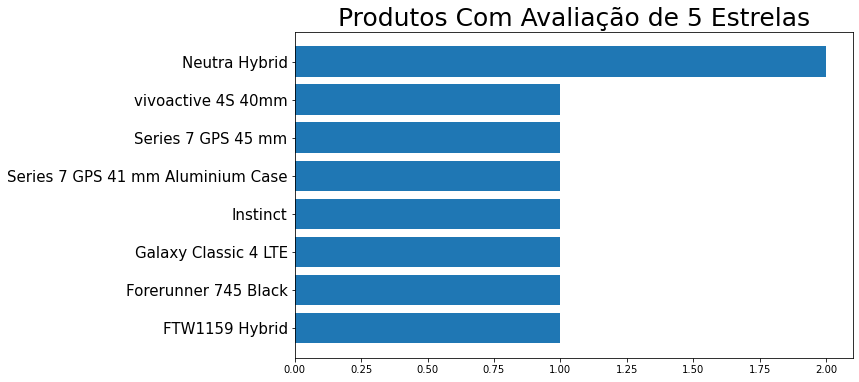

In [110]:
# max_value = max(enumerate(x), key=lambda x: x[1])[0]
# colors = ["#191970" if i == max_value else "#696969" for i in range(len(y))]

plt.figure(figsize=(10, 6))
plt.title("Produtos Com Avaliação de 5 Estrelas", size=25)
plt.barh(y, x)
plt.yticks(size=15)
plt.show()

# **Conclusão:**
* ## Chegamos a conclusão que o produto **mais bem avaliado** com a nota 5 *(entre 0 e 5)* foi **Neutra Hybrid** da marca **FOSSIL**, o mesmo com **duas** unidades avaliadas com **nota máxima** .

* ## O produto mais vendido não foi o mais bem avaliado, entretanto a marca **FOSSIL** foi **a marca mais vendida e também a marca mais bem avaliada**.

# **Question 3: Qual a cor favorita dos clientes?**

In [79]:
df["Color"] = df["Color"].apply(lambda x: x.replace(" ", ""))
favorite_color = df.groupby("Color").count()
favorite_color.head()

,Brand,Type,Model,Selling Price,Original Price,Display,Rating,Strap Material,AVG Battery,Reviews
Color,,,,,,,,,,
Beige,5,5,5,5,5,5,5,5,5,2
Black,201,201,201,201,201,201,182,201,201,34
"Black,Beige",1,1,1,1,1,1,1,1,1,0
"Black,Blue",4,4,4,4,4,4,4,4,4,0
"Black,Blue,Pink",3,3,3,3,3,3,3,3,3,0


In [64]:
favorite_color["Brand"].max()

201

In [65]:
favorite_color = favorite_color["Brand"].sort_values()

In [66]:
top_10 = favorite_color[124::]
top_10

Color
DeepNavy      7
Purple        9
Red          10
Brown        13
Gold         20
White        22
Silver       25
Grey         26
Blue         34
Black       201
Name: Brand, dtype: int64

In [67]:
y = top_10.index
x = top_10

In [71]:
data = list(zip(x, y))

data.sort()

x, y = zip(*data)

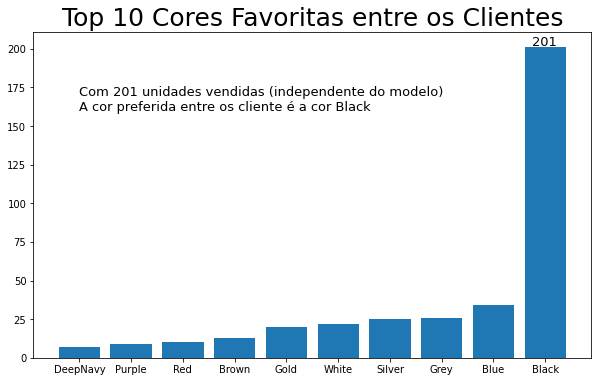

In [80]:
# max_value = max(enumerate(x), key=lambda x: x[1])[0]
# colors = ["#000000" if i == max_value else "#696969" for i in range(len(x))]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Cores Favoritas entre os Clientes", size=(25))
plt.bar(y, x)
plt.text(0, 160, "Com 201 unidades vendidas (independente do modelo)\n" +
         "A cor preferida entre os cliente é a cor Black", size=13)
plt.text(8.75, 202, x[-1], size=13)
plt.show()

# **Question 4: Qual o tipo favorito entre os clientes?**

In [127]:
favorite_type = df["Type"].value_counts()
favorite_type

Smartwatch     490
FitnessBand     75
Name: Type, dtype: int64

In [133]:
s = favorite_type.sum()
first = (favorite_type[0] / s) * 100
second = (favorite_type[1] / s) * 100

In [135]:
print(f"SmartWatches: {first:.0f}%")
print(f"FitnessBand: {second:.0f}%")

SmartWatches: 87%
FitnessBand: 13%


# **Conclusão:**
* # **87% do Público** tem como favorito o *SmartWatch* em relação ao *FitnessBand.*

# **Question 5: Existe alguma preferência em relação ao tipo de Display?**

In [136]:
display = df["Display"].value_counts()
display

AMOLED Display         355
OLED Retina Display     86
OLED Display            43
LED Display             28
LCD Display             20
PMOLED Display          20
TFT-LCD Display         13
Name: Display, dtype: int64

In [140]:
total = display.sum()

percentage = (display / total) * 100


In [152]:
percentage = round(percentage)

In [159]:
favorite_display = pd.DataFrame(percentage.values, percentage.index, columns=["Percentage"])
favorite_display

,Percentage
AMOLED Display,63.0
OLED Retina Display,15.0
OLED Display,8.0
LED Display,5.0
LCD Display,4.0
PMOLED Display,4.0
TFT-LCD Display,2.0


In [161]:
y = favorite_display.index
x = favorite_display["Percentage"]

In [167]:
data = list(zip(x, y))

data.sort()

x, y = zip(*data)

In [180]:
import numpy as np
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
labels = y

In [223]:
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.02, 0.05]

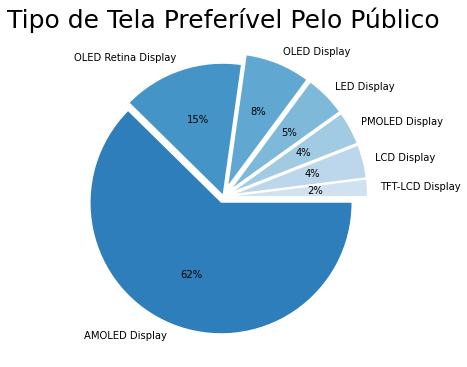

In [224]:
plt.figure(figsize=(10, 6))
plt.title("Tipo de Tela Preferível Pelo Público", size=(25))
plt.pie(x, colors=colors, labels=labels, explode=explode, autopct="%1.0f%%")
plt.show()

# **Conclusão:**
* # **Mais de 60%** dos clientes preferem dispositivos com o Display do tipo *AMOLED* em relação à outras opções no mercado.